Creating data visualizations for the aggregated ratings

In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('aggregated_ratings.csv')

In [11]:
df = df.set_index('id')
df

,light_rag,hippo_rag,gpt_4o_no_rag
id,,,
2,1,2,3
3,3,2,3
4,3,3,3
5,2,3,2
6,1,1,2
7,3,2,2
8,2,3,1
9,3,3,1
10,3,1,1


In [26]:
# graph data
# count of each column by rating
# ratings can be between 1-3. for each value, count the number of times it appears in each column. display as a graph
new_df = pd.DataFrame()
new_df['light_rag'] = df['light_rag'].groupby(df['light_rag']).count()
new_df['light_rag'] = new_df['light_rag'].astype(int)
new_df['hippo_rag'] = df['hippo_rag'].groupby(df['hippo_rag']).count()
new_df['hippo_rag'] = new_df['hippo_rag'].astype(int)
new_df['gpt_4o_no_rag'] = df['gpt_4o_no_rag'].groupby(df['gpt_4o_no_rag']).count()
new_df['gpt_4o_no_rag'] = new_df['gpt_4o_no_rag'].astype(int)
new_df.index = ['1', '2', '3']
# rename the index to be the rating
new_df.index.name = 'rating'
new_df

,light_rag,hippo_rag,gpt_4o_no_rag
rating,,,
1,6,6,10
2,6,4,6
3,9,11,5


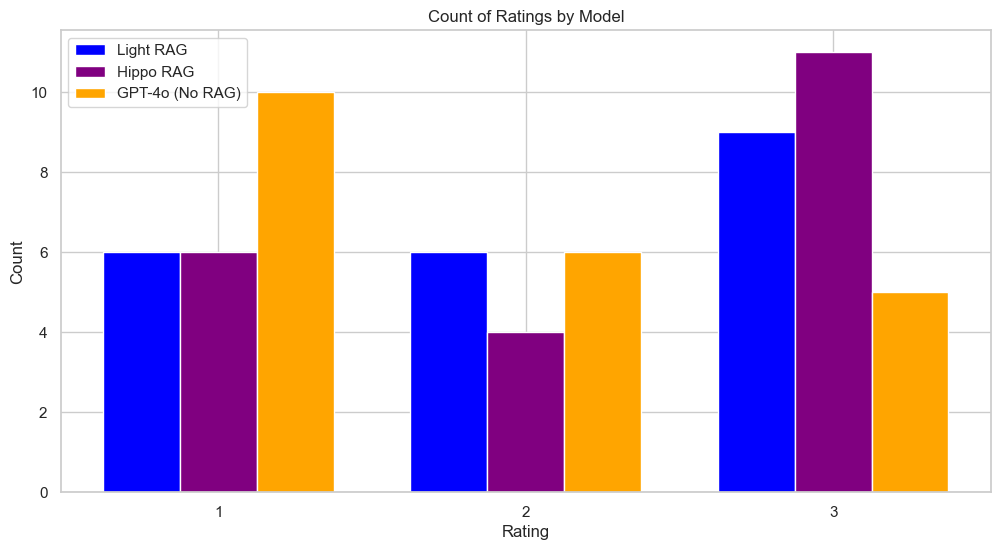

In [35]:
# graph new_df
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
# plot the data
x = np.arange(len(new_df.index))  # the label locations
width = 0.25  # the width of the bars

plt.bar(x - width, new_df['light_rag'], width, label='Light RAG', color='blue')
plt.bar(x, new_df['hippo_rag'], width, label='Hippo RAG', color='purple')
plt.bar(x + width, new_df['gpt_4o_no_rag'], width, label='GPT-4o (No RAG)', color='orange')

plt.title('Count of Ratings by Model')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(x, new_df.index)  # set the x-axis labels
plt.legend()
plt.savefig('ratings_count.png')
plt.show()

